<a href="https://colab.research.google.com/github/eugenioRSJ/EstudoCienciaDeDados/blob/main/classifica%C3%A7%C3%A3o_de_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.1
import tensorflow
from tensorflow import keras
import numpy as np


In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()
imagens_treino=imagens_treino/255.0

In [ ]:


imagens_treino.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt


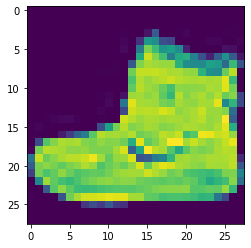

In [ ]:
plt.imshow(imagens_treino[0])

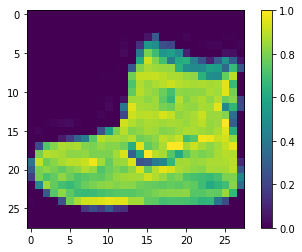

In [ ]:
plt.imshow(imagens_treino[0])
plt.colorbar()

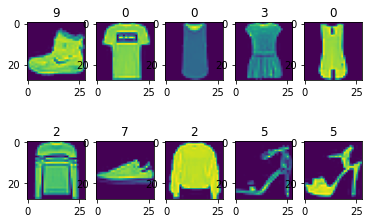

In [ ]:
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])
  

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(#primeira camada
      input_shape =(28,28)#forma da entrada
    ),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),#colocar para dormir uma porcentagem dos neuronios
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historio=modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 146us/sample - loss: 0.5237 - accuracy: 0.8146 - val_loss: 0.3968 - val_accuracy: 0.8596
Epoch 2/5
48000/48000 [==============================] - 7s 155us/sample - loss: 0.3964 - accuracy: 0.8540 - val_loss: 0.3654 - val_accuracy: 0.8677
Epoch 3/5
48000/48000 [==============================] - 6s 127us/sample - loss: 0.3581 - accuracy: 0.8670 - val_loss: 0.3593 - val_accuracy: 0.8670
Epoch 4/5
48000/48000 [==============================] - 6s 128us/sample - loss: 0.3390 - accuracy: 0.8748 - val_loss: 0.3407 - val_accuracy: 0.8759
Epoch 5/5
48000/48000 [==============================] - 7s 142us/sample - loss: 0.3194 - accuracy: 0.8814 - val_loss: 0.3401 - val_accuracy: 0.8799


In [ ]:
#salvando o modelo

from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [ ]:
testes= modelo.predict(imagens_teste)
np.argmax(testes[0])

9

In [ ]:
identificacoes_teste[0]

9

In [ ]:
#testando
perda_teste, acruacia_teste=modelo.evaluate(imagens_teste, identificacoes_teste)

10000/10000 [==============================] - 1s 73us/sample - loss: 66.5883 - accuracy: 0.8450


In [ ]:
print(perda_teste, acruacia_teste)
historio.history

66.58834629079864 0.845


{'accuracy': [0.814625, 0.8539583, 0.86704165, 0.8748125, 0.8814375],
 'loss': [0.5236748209645351,
  0.3964150926172733,
  0.3581278100311756,
  0.33896558622519174,
  0.31935175584753356],
 'val_accuracy': [0.8595833, 0.86775, 0.867, 0.87591666, 0.87991667],
 'val_loss': [0.3968345721165339,
  0.3654155430396398,
  0.35934117356936135,
  0.3407046803732713,
  0.34010509758194285]}

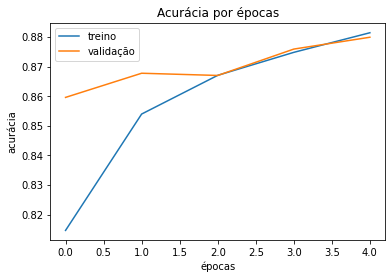

In [ ]:
plt.plot(historio.history['accuracy'])
plt.plot(historio.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

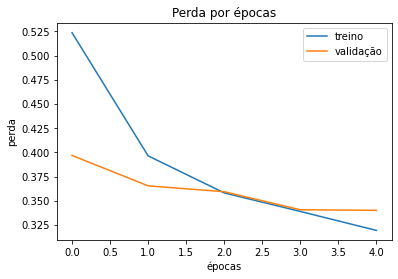

In [ ]:
plt.plot(historio.history['loss'])
plt.plot(historio.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])